# Name      :   Yohan Abeysinghe
# Index No  :   190014F

All the imports are done at the beginning. 

In [2]:
import sympy
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image 

(1). Write a program to display the squares of numbers form 1 to 5 as seen below.

In [3]:
for i in range(1,6):
    print(i, ':', i**2)

1 : 1
2 : 4
3 : 9
4 : 16
5 : 25


(2). Alter the code in 1 to print the square only of non-prime numbers. Use the isprime function in the sympy package for testing if a number is a prime.

In [4]:
for i in range(1,6):
    if not sympy.isprime(i):
        print(i, ':', i**2)

1 : 1
4 : 16


(3). Use a comprehension to do 1.

In [5]:
squares = [i**2 for i in range(1,6)]
for i, i2 in enumerate(squares):
     print(i+1, ':', squares[i])

1 : 1
2 : 4
3 : 9
4 : 16
5 : 25


(4). Use a comprehension to do 2.

In [6]:
squares = [i**2 for i in range(1,6) if not sympy.isprime(i)]
for j, j2 in enumerate(squares):
    print(j+1, ':', squares[j])

1 : 1
2 : 16


(5). Using NumPy carry out the following computations.

5(a) Matric multiplication

In [7]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([[7,8,9,1], [1,2,3,4]])
print(np.dot(A,B))
print(np.matmul(A,B))
A@B

[[ 9 12 15  9]
 [25 32 39 19]
 [41 52 63 29]]
[[ 9 12 15  9]
 [25 32 39 19]
 [41 52 63 29]]


array([[ 9, 12, 15,  9],
       [25, 32, 39, 19],
       [41, 52, 63, 29]])

5(b) Element-wise multiply

In [8]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([[3,2], [5,4], [3,1]])
print(np.multiply(A,B))

[[ 3  4]
 [15 16]
 [15  6]]


(6). Generate a 5×7 array of random integers in the interval [0,10] and extract the sub array consisting rows 2 to 4 and columns 1 and first two columns. What is the size of the resulting array?

In [9]:
A = np.random.randint(0, high=11, size=(5,7))
print(A)

B = A[2:5, 1:3]
print(B)

print(B.size)

[[ 3  1  7  0  0  4  3]
 [ 4  3  6  0  6  0  8]
 [ 2  5 10 10  0  6  6]
 [ 4  1  9  4  6  4  2]
 [ 1  7  0  9  7  4  5]]
[[ 5 10]
 [ 1  9]
 [ 7  0]]
6


(7). Show three examples of broadcasting.

Broadcasting allows the arrays of different shapes to perform arithmatic operations. Smaller array can be used on a larger array for multiple times to perform an operation. 

i. Single Dimesional Array
A scalar value is operated on each element in an array without giving a size mismatch. 

In [10]:
a = np.array([1.0, 2.0, 3.0])
print(a)

b = 2.0

print(a * b)

[1. 2. 3.]
[2. 4. 6.]


ii. Two Dimensional Array
If a dimension of one array is 1, this array is repeadetly used on each row or column of the large array and the given operation is perfomed. For this two arrays should satisfy broadcasting rules. 

In [11]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x)

y = np.array([1, 0, 1])
print(y)

print(x+y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


iii. Broadcasting is used to perform a function on an array resulting in generating functions of the form z=f(x,y). This is useful in plotting functions. 

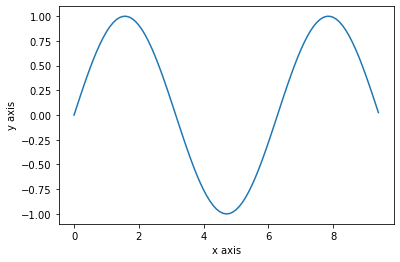

In [12]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')
 
plt.show()

iv. Used in calculations related to vector quatization. In these types of algorithms it is requred to find the closest point in a grid to an observations point. For this broadcasting is used to calculate the distaces to the availabe points from the observation point without making unnecessary copies of the array.

In [13]:
observation = np.array([111.0, 188.0])
points = np.array([[102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])
diff = points - observation    # the broadcast happens here
dist = np.sqrt(sum(diff**2))
np.argmin(dist)

1

(8). Consider the following code snippet

8(a) Append a column of ones to x to create X.

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]


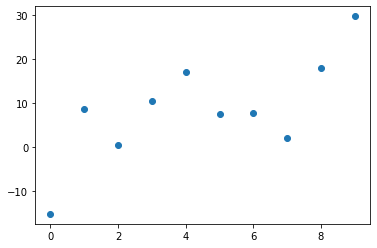

In [14]:
m,c = 2,-4
N = 10
x = np.linspace(0,N-1,N).reshape(N,1)
print(x)

sigma = 10
y = m*x+c+np.random.normal(0,sigma,(N,1))

X = np.append(np.ones((N,1)),x,axis=1)
print(X)

plt.scatter(x,y)

8(b) Compute [X⊺X]−1X⊺ y

In [15]:
W = linalg.inv(X.T @ X) @ X.T @ y
print(W)           #Matrix containing intercept and the gradient.

[[-3.8752118 ]
 [ 2.78655578]]


(9). (Advanced, optional) Write a function that computes the square root of a given number by

9(a) (a) Computing the hyperbolic estimate of the square root as the initial guess. I.e., for S = a×102n where a ∈ [1,100]

9(b) Using this initial estimate as s0 use Newton-Raphson method2 to find the
square root with a given precision (e.g., 10−5)

9(c) Compute the square root of 64, 75, 100, and 1600.

(10). Use Gaussian smoothing to filter the noise in the image gal_gaussian.png shown in Fig. 1.

In [16]:
im = cv.imread(r'gal_gaussian.png')
assert im is not None

blur = cv.GaussianBlur(im,(5,5),0)

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('gaussian filtered', blur)
cv.waitKey(0)

cv.destroyAllWindows()

The Gaussian filterd image is shown belove.

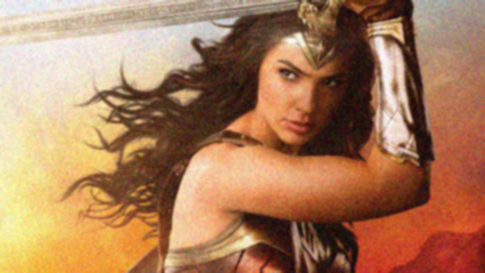

(11). Use median filtering to filter the salt and pepper noise in the image gal_sandp.png shown in Fig. 2.

In [17]:
im = cv.imread(r'gal_sandp.png')
assert im is not None

mfil = cv.medianBlur(im,5)

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('median filtered', mfil)
cv.waitKey(0)

cv.destroyAllWindows()

Median filtered image is shown belove.

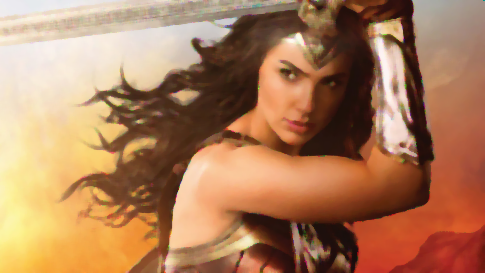

(12). Create a 40×60 grayscale image and change the color of the top-right quarter to 125.

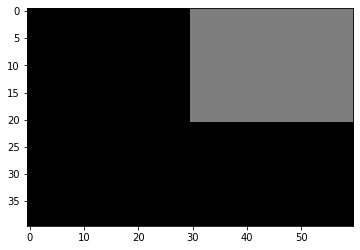

In [18]:
im = np.zeros((40,60), dtype=np.uint8) #dtype is used to define the
# data type. Here it is 8-bit unsigned integer.
im[0:21, 30:61] = 125

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

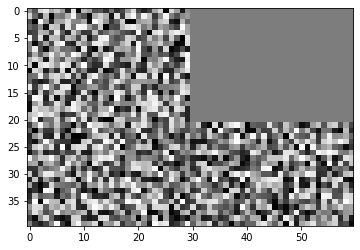

In [19]:
im = np.random.rand(40,60) * 255
im[0:21, 30:61] = 125
im = Image.fromarray(im.astype('uint8'))

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

(13). Create a 40×60 color image and change the color of the bottom-left quarter to “Barbie Pink”.

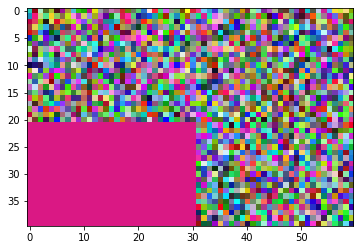

In [22]:
im = np.random.rand(40,60,3) * 255
im[21:41, 0:31] = [218, 24, 132]
im = Image.fromarray(im.astype('uint8')).convert('RGB')

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

(14). Increase the brightness of the image tom_dark.jpg shown in Fig. 3.

In [21]:
im = cv.imread(r'tom_dark.jpg')
assert im is not None

intensity = np.ones(im.shape, dtype='uint8')*60
bright = cv.add(im, intensity)

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('brightned', bright)
cv.waitKey(0)

cv.destroyAllWindows()

Brightened image is shown belove.

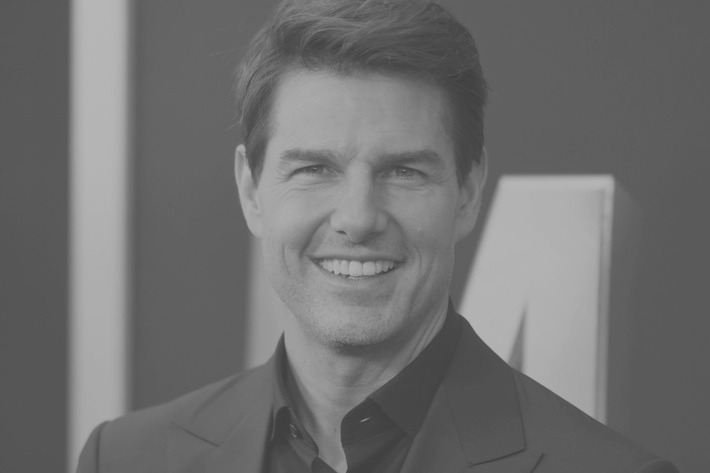